## Observations and Insights 

In [107]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "/Users/williampappas/Desktop/GitLab/02-Homework/05-Matplotlib/01-Case-Assignment/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/williampappas/Desktop/GitLab/02-Homework/05-Matplotlib/01-Case-Assignment/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [108]:
# Checking the number of mice.
len(merge_data["Mouse ID"].unique())

249

In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
doublemouse = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(doublemouse)

['g989']


In [110]:
# Optional: Get all the data for the duplicate mouse ID. 


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_scrub = merge_data[merge_data["Mouse ID"].isin(doublemouse) == False]
mouse_scrub.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [112]:
# Checking the number of mice in the clean DataFrame.
len(mouse_scrub["Mouse ID"].unique())

248

## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summstats=mouse_scrub.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=summstats.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=summstats.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=summstats.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=summstats.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=summstats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analytics=pd.DataFrame({"mean tv":mean,"median tv":median,"variance":variance, "SD": sd, "SEM": sem})
analytics=analytics.round(2)
analytics.head()

,mean tv,median tv,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [138]:
# Using the aggregation method, produce the same summary statistics in a single line
analytics.agg('mean', axis='rows')

mean tv      50.976
median tv    49.903
variance     47.858
SD            6.821
SEM           0.502
dtype: float64

## Bar and Pie Charts

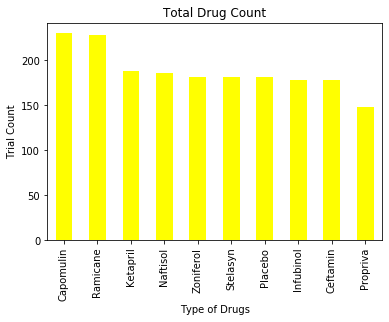

In [115]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
druggies=mouse_scrub["Drug Regimen"].value_counts()
y_axis=druggies.values
x_axis=druggies.index
druggies.plot(kind="bar", facecolor='yellow',)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

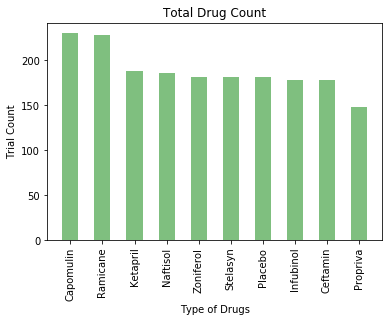

In [116]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
druggos= mouse_scrub["Drug Regimen"].value_counts()
y_axis=druggos.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=druggos.index
plt.bar(x_drugs, y_axis, color='g', alpha=0.5, align= "center", width= .5)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

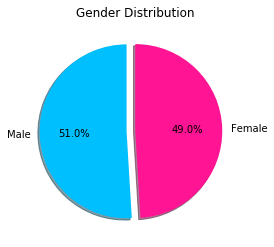

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genx=mouse_scrub["Sex"].value_counts()
labels=genx.values
sizes=genx.values
colors=["deepskyblue", "deeppink"]
explode=[0.1,0]
genx.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.ylabel(" ")
plt.show()

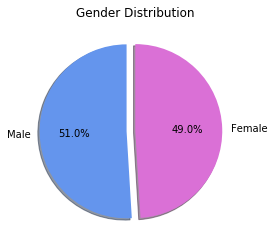

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genz=mouse_scrub["Sex"].value_counts()
labels=genz.index 
sizes=genz.values
colors=["cornflowerblue", "orchid"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumortop = mouse_scrub[mouse_scrub["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumortop = tumortop.sort_values(["Timepoint"], ascending=False)
tumortop
merged = tumortop[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merged

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [120]:
capomulin= merged.loc[merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged.loc[merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged.loc[merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged.loc[merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
#Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap= lower_cap-(1.5*iqr_cap)
upout_cap= upper_cap+(1.5*iqr_cap)
#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram= upper_ram-lower_ram
lowout_ram= lower_ram-(1.5*iqr_ram)
upout_ram= upper_ram+(1.5*iqr_ram)
#Infubinol
quartile_inbol= infubinol.quantile([.25,.5,.75])
lower_inbol= quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol= upper_inbol-lower_inbol
lowout_inbol= lower_inbol-(1.5*iqr_inbol)
upout_inbol= upper_inbol+(1.5*iqr_inbol)
#Ceftamin
quartile_ceft= ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft= lower_ceft-(1.5*iqr_ceft)
upout_ceft= upper_ceft+(1.5*iqr_ceft)
print(f"Below {round(lowout_cap, 2)} is an outlier for Capomulin")
print(f"Above {round(upout_cap, 2)} is an outlier for Capomulin")
print(f"Below {round(lowout_ram, 2)} is an outlier for Ramicane")
print(f"Above {round(upout_ram, 2)} is an outlier for Ramicane")
print(f"Below {round(lowout_inbol, 2)} is an outlier for Infubinol")
print(f"Above {round(upout_inbol, 2)} is an outlier for Infubinol")
print(f"Below {round(lowout_ceft, 2)} is an outlier for Ceftamin")
print(f"Above {round(upout_ceft, 2)} is an outlier for Ceftamin")

Below 26.71 is an outlier for Capomulin
Above 55.97 is an outlier for Capomulin
Below 24.19 is an outlier for Ramicane
Above 57.49 is an outlier for Ramicane
Below 32.31 is an outlier for Infubinol
Above 72.32 is an outlier for Infubinol
Below 32.82 is an outlier for Ceftamin
Above 71.19 is an outlier for Ceftamin


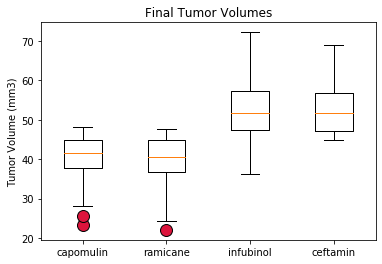

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxedplot = dict(markerfacecolor='crimson',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

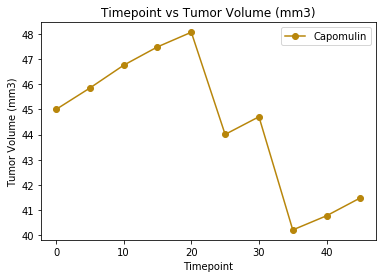

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
captab= mouse_scrub.loc[mouse_scrub['Drug Regimen'] == 'Capomulin']
mousecap= mouse_scrub.loc[mouse_scrub['Mouse ID'] == 'l509']
plt.plot(mousecap["Timepoint"], mousecap["Tumor Volume (mm3)"], marker ='o', color='darkgoldenrod', label="Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

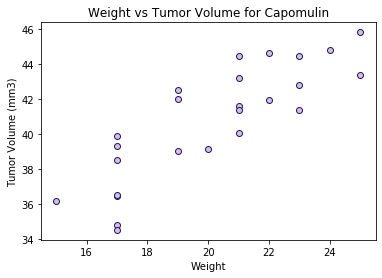

In [123]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
captabs= mouse_scrub.loc[mouse_scrub['Drug Regimen'] == 'Capomulin']
capmean=captabs.groupby(["Mouse ID"]).mean()
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"],facecolors="thistle", edgecolors="midnightblue")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

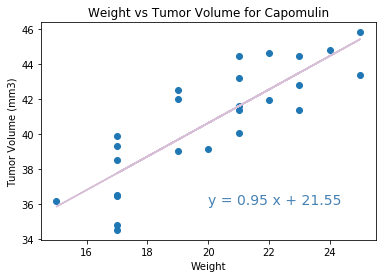

In [128]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"])
regress_values=capmean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"] )
plt.plot(capmean["Weight (g)"], regress_values, color='thistle')
plt.annotate(line_eq,(20,36), color='steelblue', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()